# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
# Importing libraries and loading the dataset
import pandas as pd  # For data analysis and manipulation

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np   # For numerical operations
import warnings
warnings.filterwarnings('ignore')
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
haber=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
haber

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

### Understanding the data

In [2]:
# Prints the first 5 entires from the dataset
haber.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Brief explanation about the dataset
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Observations:
<ol>
  <li>The are no missing values in the dataset.</li>
  <li>All the columns are of the integer datatype.</li>
  <li>Age             - age of the person at the time of operation.</li>
  <li>Operaion_Year   - year of patient's operation.</li>
  <li>Axil_Nodes      - implies whether cancer affected the lymph node, if it is positive node then cancer has been spread to lymph nodes.</li>
   <li>Survival Status:</li>
   <ol>
      <li>1 = the patient survived 5 years or longer.</li>
      <li>2 = the patient died with in 5 years.</li>
    </ol>
    
</ol>


### High Level Statistics

### (Q) How many datapoints and features.?

In [4]:
# Number of data-points(rows) and features(columns)

haber.shape

(306, 4)

### Observation:
<ol>
    <li>The data set contains 306 rows and 4 colums</li>
</ol>

### (Q) What are the column names in our dataset.?

In [5]:
haber.columns

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')

<h3>(Q) How many data points for each class are present? </h3>

In [6]:
# Prints count of the each class.
haber['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
print(haber['survival_status'].unique())

[1 2]


## Observation
<ol>
    <li>The dataset contains 306 data points.</li>
    <li>Dataset contains 3 input variables(age, operation_year, axil_nodes) and one output variable(survival_status).</li>
    <li>Output variable has 2 class label(1,2)</li>
    <li>Heberman is an imbalanced dataset because the number of data-points for both of the class are significantly different.</li>
    
    
    
</ol>

### 1.2 - Explain the objective of the problem.
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

In [8]:
haber.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Feature Description:-

<ul>
  <li>Count    :- Total number of data points present in the respective columns.</li>
  <li>Mean     :- Mean of all the values present in the respective columns. </li>
  <li>Std      :- Standard deviation of all the values present in the respective columns.</li>
  <li>Min      :- The minimum value in the column</li>
  <li>25th     :- Indicates 25th percentile value.</li>
  <li>50th     :- Indicates 50th percentile value.</li>
  <li>75th     :- Indicates 75th percentile value.</li>
  <li>Max      :- The maximum value in the column.</li>
</ul>



### Observation:-
<ol>
    <li>Average node present in the patients who survived is less than average node of the whole dataset.</li>
    <li>The age of the patients vary from minimum 30 to maximum 83 with median of 52 </li>
    <li>The dataset contains small number of records and it is imbalenced as it contains more than 72% values with survival status=1</li>
</ol>

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [9]:
haber

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


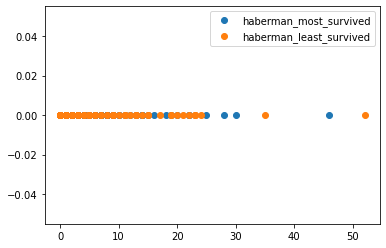

In [10]:
# Let's plot an 1-D scatter plot
haberman_most_survived  = haber.loc[haber['survival_status']==1]
haberman_least_survived = haber.loc[haber['survival_status']==2]
classes = ['haberman_most_survived','haberman_least_survived']

plt.plot(haberman_most_survived['axil_nodes'],np.zeros_like(haberman_most_survived['axil_nodes']),'o')
plt.plot(haberman_least_survived['axil_nodes'],np.zeros_like(haberman_least_survived['axil_nodes']),'o')
plt.legend(labels=classes)
plt.show()
plt.close()

### Observation:-
<ol>
    <li>Here, we can obeserve that the data of least survived status are mostly overlaping on most survived status due to which we can't conclue on this data.</li>
</ol>

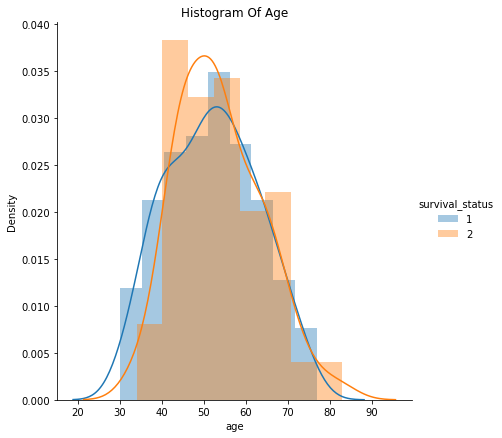

In [11]:
# Histogram of age
g=sns.FacetGrid(haber,hue="survival_status",size=6)
g.map(sns.distplot,"age")
g.add_legend()
plt.title("Histogram Of Age")
plt.show()
plt.close()

### Observation:-
<ol>
    <li>From the above plot it is observed that at the age range from 30-75 the status of survival and death is same.So, using this data point we cannot predict anything</li>
</ol

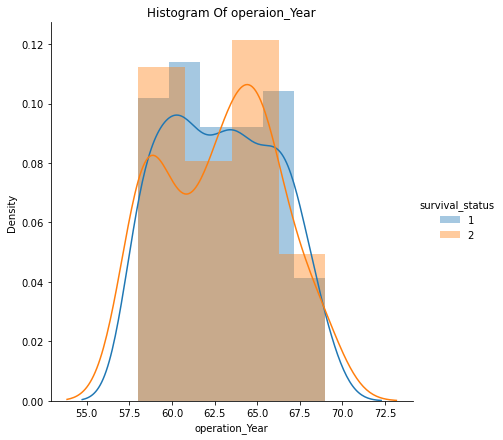

In [12]:
# Histogram of operation_Year
g=sns.FacetGrid(haber,hue="survival_status",size=6)
g.map(sns.distplot,"operation_Year")
g.add_legend()
plt.title("Histogram Of operaion_Year")
plt.show()
plt.close()

### Observations:
- From the above figure we can say that there is much overlapping between the patients who survived and the patients who couldn't based on the patient's operation year. Hence we  cannot determine the survival status of the patient on his operation year.

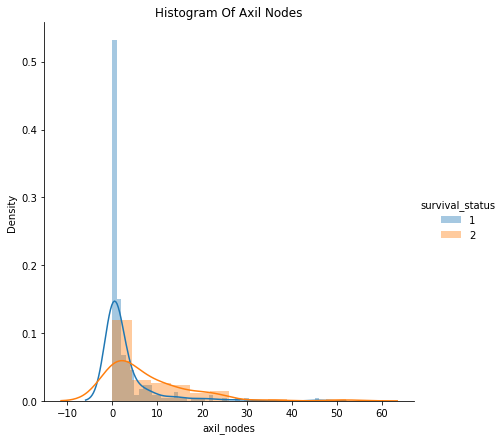

In [13]:
# Histogram of axil_nodes
g=sns.FacetGrid(haber,hue="survival_status",size=6)
g.map(sns.distplot,"axil_nodes")
g.add_legend()
plt.title("Histogram Of Axil Nodes")
plt.show()
plt.close()

### Observations:
- From the above histogram if number of axil_nodes <= 3 then there is more chances that the patient would survive.
- And, here the probability distribution function (PDF) for the survived patients is higher as compared to the patient who couldn't survived.

### Observations:-
- Here, we cannot get into a good conclustion with histograms.
-Feature 'age' and 'year' are not relavant for classification of survival status as there is higher overlapping between the class lables.
-Feature variable 'axil_node is more relavant for classification. So, we need to concentrate more on 'axil_node' variable.

In [14]:
haber_1 = haber.loc[haber["survival_status"] == 1]
haber_2 = haber.loc[haber["survival_status"] == 2]

In [15]:
survived = haber.loc[haber['survival_status'] ==1];
dead = haber.loc[haber['survival_status'] ==2];

## PDF and CDF

bin edges [34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
 
probability density function
 
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
 
Cumulative distribution function
 
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


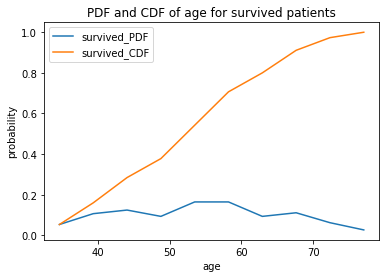

In [16]:
# CDF and PDF plot of column age for survived patients.

count,edges=np.histogram(survived['age'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("age")
plt.ylabel('probability')
plt.title("PDF and CDF of age for survived patients")
plt.legend(['survived_PDF','survived_CDF'])
plt.show()
plt.close()

bin edges [38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
 
probability density function
 
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
 
Cumulative distribution function
 
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


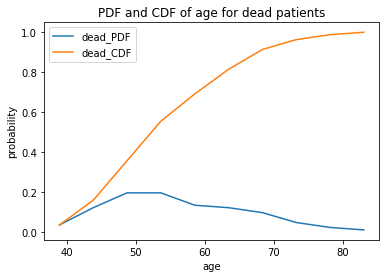

In [17]:
# CDF and PDF plot of  column age for dead patients.

count,edges=np.histogram(dead['age'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("age")
plt.ylabel('probability')
plt.title("PDF and CDF of age for dead patients")
plt.legend(['dead_PDF','dead_CDF'])
plt.show()
plt.close()

bin edges [59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
 
probability density function
 
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
 
Cumulative distribution function
 
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]


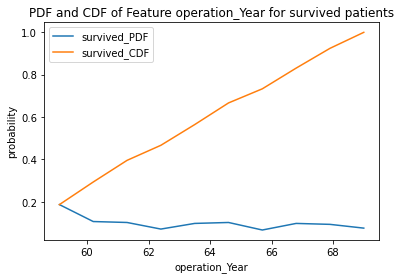

In [18]:
# PDF and CDF of operation year column for survived patients
count,edges=np.histogram(survived['operation_Year'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("operation_Year")
plt.ylabel('probability')
plt.title("PDF and CDF of Feature operation_Year for survived patients")
plt.legend(['survived_PDF','survived_CDF'])
plt.show()
plt.close()

bin edges [59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
 
probability density function
 
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
 
Cumulative distribution function
 
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


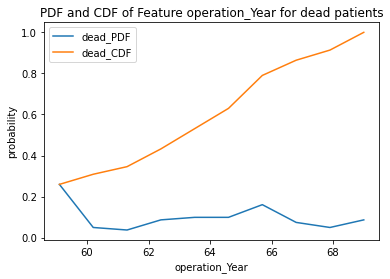

In [19]:
# PDF and CDF of operation year column for dead patients
count,edges=np.histogram(dead['operation_Year'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("operation_Year")
plt.ylabel('probability')
plt.title("PDF and CDF of Feature operation_Year for dead patients")
plt.legend(['dead_PDF','dead_CDF'])
plt.show()
plt.close()

bin edges [ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
 
probability density function
 
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
 
Cumulative distribution function
 
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


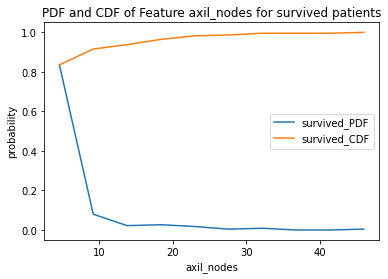

In [20]:
# CDF and PDF plot of column positive axil nodes for survived patients
count,edges=np.histogram(survived['axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("axil_nodes")
plt.ylabel('probability')
plt.title("PDF and CDF of Feature axil_nodes for survived patients")
plt.legend(['survived_PDF','survived_CDF'])
plt.show()
plt.close()

### Observations:
- About 85% of the patients who survived has less than 10 axil nodes.
- 100% of the patients who survived has leass than 40 axil nodes.

bin edges [ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
 
probability density function
 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
 
Cumulative distribution function
 
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


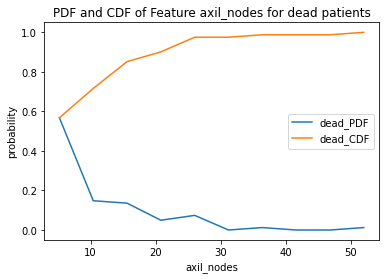

In [21]:
# CDF and PDF plot of column positive axil nodes for survived patients
count,edges=np.histogram(dead['axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("axil_nodes")
plt.ylabel('probability')
plt.title("PDF and CDF of Feature axil_nodes for dead patients")
plt.legend(['dead_PDF','dead_CDF'])
plt.show()
plt.close()

### Observations:
- 70% of the patients who died with in 5 years has less than 10 axil nodes.

bin edges [ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
 
probability density function
 
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
 
Cumulative distribution function
 
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
bin edges [ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
 
probability density function
 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
 
Cumulative distribution function
 
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


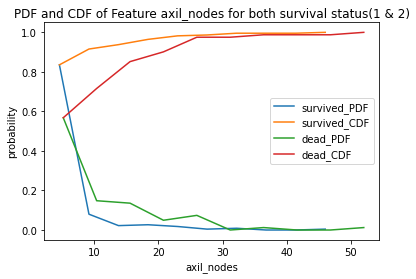

In [22]:
# CDF and PDF plot of column positive axil nodes for survived patients
count,edges=np.histogram(survived['axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
#plt.xlabel("axil_nodes")
#plt.ylabel('probability')
#plt.title("PDF and CDF of Feature axil_nodes for dead patients")
#plt.legend(['survived_PDF','survived_CDF'])
#plt.show()
#plt.close()


# CDF and PDF plot of column positive axil nodes for dead patients.
count,edges=np.histogram(dead['axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)

plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xlabel("axil_nodes")
plt.ylabel('probability')
plt.title("PDF and CDF of Feature axil_nodes for both survival status(1 & 2)")
plt.legend(['survived_PDF','survived_CDF','dead_PDF','dead_CDF'])
plt.show()
plt.close()

### Observations:-
- axil node is the most import feature to predict the survival status after 5 years.
- The survival rates is extremely high for patients having less than 3 axil nodes.
- About 92% of the patients who survived have positive axil nodes between 0 to 10.
- Only 3-4% of the patients who sirvived have axil nodes grater than 15.
- About 70% of the patients who has not survived have 0 to 10 axil nodes.
- Patients who has not survived have more number of axil nodes.


## Box Plot

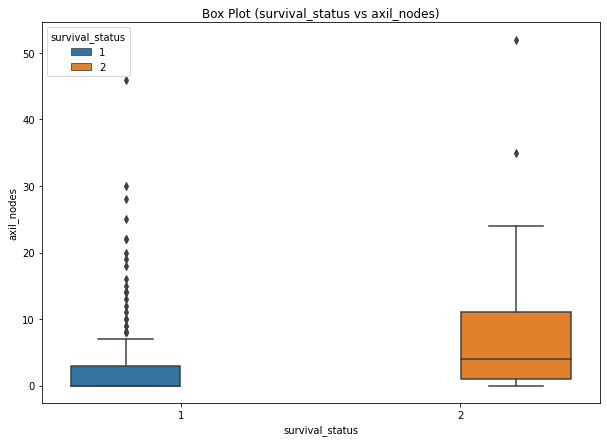

In [23]:
plt.figure(figsize=(10,7))
plt.title("Box Plot (survival_status vs axil_nodes)")
sns.boxplot(data=haber,x='survival_status',y='axil_nodes',hue='survival_status')
plt.show()
plt.close()

### Observation:-
- About 50% of patients who is not survived(status =2) has less than 3 axil nodes.
- 75 % of the patients who survived has less than 2 axil nodes.

## Violin Plot

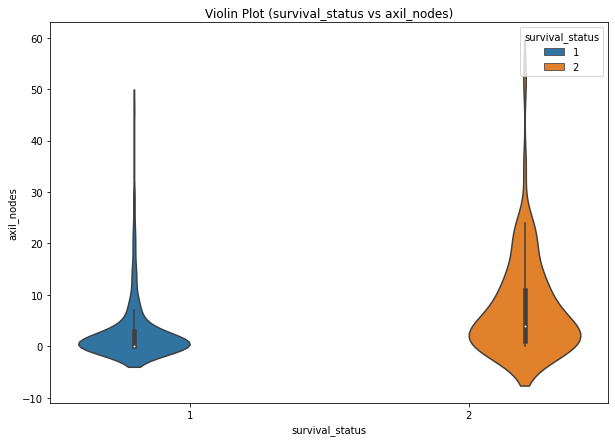

In [24]:
plt.figure(figsize=(10,7))
plt.title("Violin Plot (survival_status vs axil_nodes)")
sns.violinplot(data=haber,x='survival_status',y='axil_nodes',hue='survival_status')
plt.show()
plt.close()

### Observation:-
<ol>
    <li>For status=1 patient's nodes are densed bottom indicates that patients with status=1 have less
number of nodes.</li>
    <li>Significant number of nodes are present for patients with status=2.</li>
</ol

## Mean , Std , Median , Percentile , Quantiles and Mad


In [25]:
from statsmodels import robust

In [26]:
print("===============STATUS 1=========================")
print(" ")
print("mean =",np.mean(haber_1['axil_nodes']))
print(" ")
print("standard deviation =",np.std(haber_1['axil_nodes']))
print(" ")
print("median =",np.median(haber_1['axil_nodes']))
print(" ")
print("90th percentile =",np.percentile(haber_1['axil_nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(haber_1['axil_nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(haber_1["axil_nodes"]))


===============STATUS 1=========================
 
mean = 2.7911111111111113
 
standard deviation = 5.857258449412131
 
median = 0.0
 
90th percentile = 8.0
 
quantiles (25%, 50% and 75%) = [0. 0. 3.]
 
median absolute deviation 0.0


In [27]:
print("************************STATUS 2****************************")
print(" ")
print("mean =",np.mean(haber_2['axil_nodes']))
print(" ")
print("standard deviation =",np.std(haber_2['axil_nodes']))
print(" ")
print("median =",np.median(haber_2['axil_nodes']))
print(" ")
print("90th percentile =",np.percentile(haber_2['axil_nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(haber_2['axil_nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(haber_2["axil_nodes"]))

************************STATUS 2****************************
 
mean = 7.45679012345679
 
standard deviation = 9.128776076761632
 
median = 4.0
 
90th percentile = 20.0
 
quantiles (25%, 50% and 75%) = [ 1.  4. 11.]
 
median absolute deviation 5.930408874022408


### Observations:-
- from above informations, patients who survived has lesser average on axil nodes.
-90% of patients who survived has axil nodes <= 8 and 90% of patients who not survived
has axil node<=20.
-axil nodes of patient's with status=1 is less spreaded.


### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


## 2D Scatter Plot

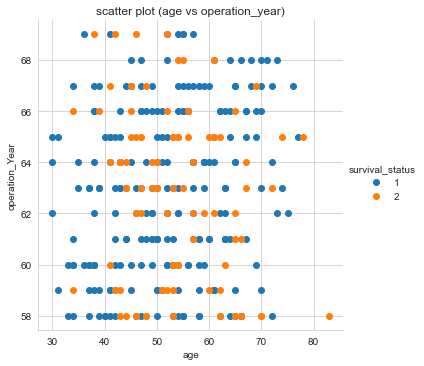

In [28]:
sns.set_style("whitegrid")
g=sns.FacetGrid(haber,hue="survival_status",size=5)
g.map(plt.scatter,'age','operation_Year')
plt.title("scatter plot (age vs operation_year)")
g.add_legend()
plt.show()

### Observation:
- From the scatter plot between features 'age' and 'operation _year', we can say that ther is extreme overlap between the points. So, we can't make any conclusions

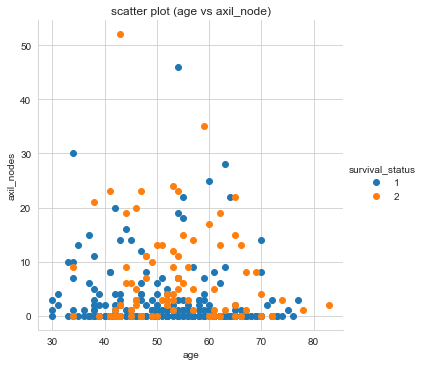

In [29]:
sns.set_style("whitegrid")
g=sns.FacetGrid(haber,hue="survival_status",size=5)
g.map(plt.scatter,'age','axil_nodes')
plt.title("scatter plot (age vs axil_node)")
g.add_legend()
plt.show()

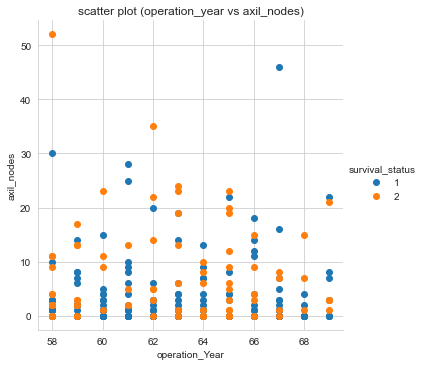

In [30]:
sns.set_style("whitegrid")
g=sns.FacetGrid(haber,hue="survival_status",size=5)
g.map(plt.scatter,'operation_Year','axil_nodes')
plt.title("scatter plot (operation_year vs axil_nodes)")
g.add_legend()
plt.show()

### Observation:
- Compared to other features, from the scatter plot between 'operation_year' and 'axil_nodes' we can say that there is better seperation between the two class variables. 

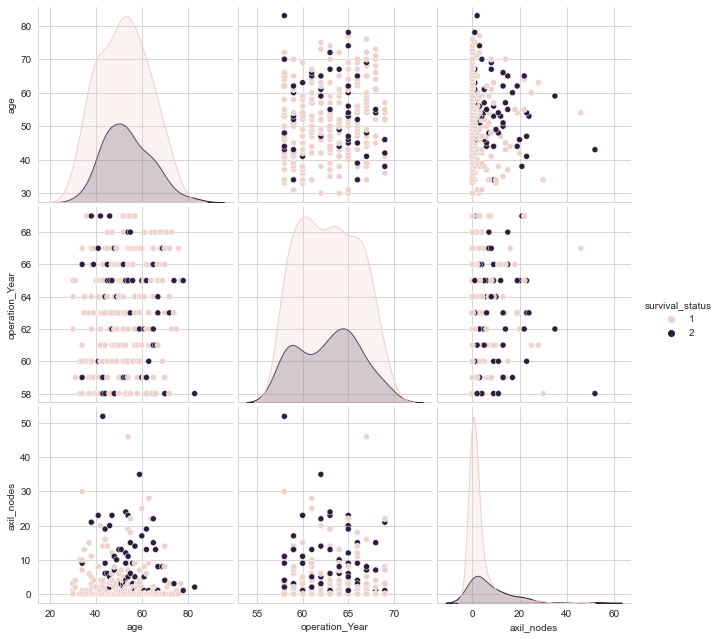

In [31]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,hue="survival_status",vars=["age","operation_Year","axil_nodes"],size=3)
plt.show()


### Observations:

- From the above plot we are not getting any useful information.
- All data points are spread across in the survival status labels.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

In [32]:
haber.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:-
- averge axil nodes present in patients who survived is less than averge node of whole data
set.



In [33]:
haber_0=haber.loc[haber['axil_nodes']<=0]

In [34]:
haber_0.shape

(136, 4)

## Count Plot

Text(0.5, 1.0, 'count plot of node =0')

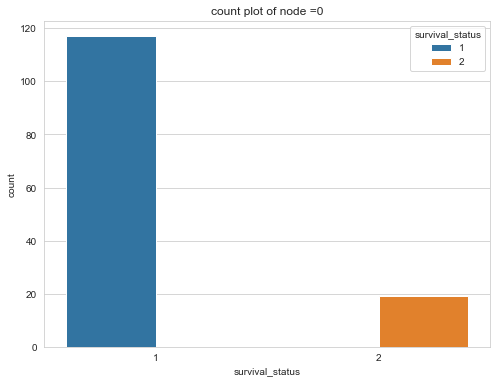

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x="survival_status",data=haber_0,hue="survival_status")
plt.title("count plot of node =0")

### Observations
- in the whole data set, 136 points have axil node =0.
- in 136 patients more than 85% of patients survived.


###  Overall Conclusions:
- it is a inbalanced data set.
- features age and operation year is not good for classification.
- feature "axil nodes' is relavant for classification but we cannot proceed simply with axil node feature only.
- patients who survived have lesser number of axil nodes or positive nodes equal to zero.
- we need more features for classification




## From scatter plots and Pair plots

- From 1D- Scatter plot we cannot make a conclusion becase the least_survived and most_survived status points are ovelapping extremely with each other.
- From 2D- Scatter plot ,we can say that patients who have axil nodes=0 has more probability to survive.
- There is more overlap between the points when plotted on pair plots.
- Orange points in the plot shows that the patinet surived 5 or more years
- Blue points in the plot shows that the patinets died with in five years of the treatment
- Features 'age' and axil_nodes are most useful features in determining the survival status.

## From Histograms

- From the histogram of feature 'age' we can say that the age range from 30-75, the status of survival and death is same.So, using this data point we cannot predict anything.
- Feature'operation_Year'is not good for clarification as the deaths and survival rate is same.
- From the histogram of feature 'axil_nodes' we can say that patients with axil nodes beteen 0 - 3 has more survival rate. And we can also say that 'axil_nodes' feature is best for classification compared to other features.

## From PDF and CDF

- axil node is the most import feature to predict the survival status after 5 years.
- The survival rates is extremely high for patients having less than 3 axil nodes.
- About 92% of the patients who survived have positive axil nodes between 0 to 10.
- Only 3-4% of the patients who sirvived have axil nodes grater than 15.
- About 70% of the patients who has not survived have 0 to 10 axil nodes.
- Patients who has not survived have more number of axil nodes.


## From Box plot


- About 50% of patients who is not survived(status =2) has less than 3 axil nodes.
- 75 % of the patients who survived has less than 2 axil nodes.
- Large number of outlier is present that even if axil nodes are higher, some patients are survived.

## From Violin plot

- For status=1 patient's nodes are densed bottom indicates that patients with status=1 have less number of nodes.
- Significant number of nodes are present for patients with status=2.

## Conclusion:

- By plotting all the necessary tools (pdf, cdf, box-plot, pair-plot, scatter-plot, etc.)
- We conclude that if number of axil nodes are less then there is more probability that the patinet could survive for 5 or more years.
- On the basis of ages of the patients we can say that if the age of the patient is less than 40, then his survival rate is probabily high.
- For more detailed analysis, we need more column values for each feature in the data set.